<a href="https://colab.research.google.com/github/GildasTaliah/NatLangPro_py/blob/main/ExpReutTextData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPLORING REUTERS TEXT DATA: Trigram Language Modelling and Sentiment Analysis using Natural Language Processing and Machine Learning Techniques**



# Basic use of LLM

Large Language Modelling (LLM) involves creating models that can undertand, generate and manipulate human langauge. They are usually trained on large sets of textual data to predict the next word in a sentence, translate languages, summarize text and more.

In here we provide a simple example on LLM, predicting the next word in a sentence and summarizing an article.

In [2]:
# Import libaries
import nltk
from nltk.corpus import reuters
from nltk import trigrams
from collections import defaultdict

In [3]:
# Download the reuters dataset and punkt tokenizer
''' To implement a simple example of the use of LLM, we will work with the reuters textual  dataset
and utilize 'punkt' to parse the text data
'''
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Let's see what is inside reuters

In [4]:
# Extract sentences and save in a list
reut_list =  list()

for sentence in reuters.sents():
  reut_list.append(sentence)

In [98]:
# View first sentence
import numpy as np
np.array(reut_list[0])

array(['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S',
       '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between',
       'the', 'U', '.', 'S', '.', 'And', 'Japan', 'has', 'raised',
       'fears', 'among', 'many', 'of', 'Asia', "'", 's', 'exporting',
       'nations', 'that', 'the', 'row', 'could', 'inflict', 'far', '-',
       'reaching', 'economic', 'damage', ',', 'businessmen', 'and',
       'officials', 'said', '.'], dtype='<U11')

In [6]:
# First sentence, third word only
reut_list[0][2]

'FEAR'

In [7]:
# Third word from second sentence
reut_list[1][2]

'Reuter'

In [8]:
# Punkt needs to have been downloaded to make use of tokenizer
from nltk.tokenize import sent_tokenize, word_tokenize

sent = ' '.join(reut_list[0])

# Tokenize into words
np.array(word_tokenize(sent))

# Tokenize into sentence
np.array(sent_tokenize(sent))

array(['ASIAN EXPORTERS FEAR DAMAGE FROM U .',
       'S .- JAPAN RIFT Mounting trade friction between the U .', 'S .',
       "And Japan has raised fears among many of Asia ' s exporting nations that the row could inflict far - reaching economic damage , businessmen and officials said ."],
      dtype='<U160')

In [9]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# Download the stopwords corpus
nltk.download('stopwords')

# Get the English stopwords
stopW = set(stopwords.words('english'))
print()
print(f' First five Stop Words: {list(stopW)[0:5]} \n')


# Flatten reut_list to get individual words
flattened_words = [word for sentence in reut_list for word in sentence]

# Stem each word, reduce to root
# Computationally inexpensive  compared to lemmatization
port_stem = PorterStemmer()
stemW = [port_stem.stem(word) for word in flattened_words if not word in stopW ]


np.array(stemW[0:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



 First five Stop Words: ["shouldn't", 'ourselves', 'has', 'most', 'our'] 



array(['asian', 'export', 'fear', 'damag', 'from', 'u', '.', 's', '.-',
       'japan', 'rift', 'mount', 'trade', 'friction', 'u', '.', 's', '.',
       'and', 'japan', 'rais', 'fear', 'among', 'mani', 'asia', "'",
       'export', 'nation', 'row', 'could'], dtype='<U8')

In [10]:
# Each row is a document and from it a a sentiment can be obtained
# The sentances have already been tokenized
import pandas as pd
import re

# Text cleaning
# Loop through each word in a sentence for each sentence in reut_list
reut_listc = [[re.sub(r'-', ' ', word).lower() for word in sent] for sent in reut_list ]

# For each sentence remove the quotes from each word
reut_listc = [' '.join(sentence) for sentence in reut_listc]
document = pd.DataFrame(reut_listc, columns = ['sentence'])


# Tokens from each column
word_tokens = [word_tokenize(sent) for sent in document.sentence]
len_tokens = []

for i in range(len(word_tokens)):
  len_tokens.append(len(word_tokens[i]))

document['num_tokens'] = len_tokens
document.head()

,sentence,num_tokens
0,asian exporters fear damage from u . s . japa...,48
1,they told reuter correspondents in asian capit...,36
2,but some exporters said that while the conflic...,29
3,the u . s . has said it will impose 300 mln dl...,49
4,unofficial japanese estimates put the impact o...,33


In [11]:
document.describe()

,num_tokens
count,54716.000000
mean,31.331475
std,19.798715
min,1.000000
25%,19.000000
50%,28.000000
75%,39.000000
max,973.000000


## Problem Statement


- **Predict next word in a sentence**


The basic use of Large Langauge Modelling in here, would be be to predict/suggest the third word of a sentence given the first two words. To this end, we going to make use of three words: word 1, word 2 and word 3; from each sentence in reuters (reut_list).


We start by creating an empty dictionary, whereby the *dictionary key* is named after the first two words (word 1 and word 2) of the extract, then under each key, we save different words that follow that same key. If a 'word 3' comes in the second time (n-th time) under a unique key, the word takes the value 2 (or the n-th value) with it.

Let us see an example use case:

In [12]:
# Create a placeholder for the keys and words
modell = defaultdict(lambda : defaultdict(lambda: 0))

In [13]:
modell
modell[(1,1)]['Maths'] += 1
modell[(1,1)]['Maths'] += 1
modell[(1,1)]['Math'] += 1
modell[(1,1)]['Maths'] += 1
modell[(1,2)]['Stats'] += 1
modell[(1,2)]['Stat'] += 1

In [14]:
modell

defaultdict(<function __main__.<lambda>()>,
            {(1,
              1): defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>, {'Maths': 3,
                          'Math': 1}),
             (1,
              2): defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>, {'Stats': 1,
                          'Stat': 1})})

In [15]:
# Create a placeholder for the model
model = defaultdict(lambda : defaultdict(lambda: 0))

In [16]:
# A sentences/text of words, back to a sentence/text of tokens
reut_listc = [sent.split() for sent in reut_listc]

In [17]:
np.array(reut_listc[0])

array(['asian', 'exporters', 'fear', 'damage', 'from', 'u', '.', 's', '.',
       'japan', 'rift', 'mounting', 'trade', 'friction', 'between', 'the',
       'u', '.', 's', '.', 'and', 'japan', 'has', 'raised', 'fears',
       'among', 'many', 'of', 'asia', "'", 's', 'exporting', 'nations',
       'that', 'the', 'row', 'could', 'inflict', 'far', 'reaching',
       'economic', 'damage', ',', 'businessmen', 'and', 'officials',
       'said', '.'], dtype='<U11')

In [18]:
# Count frequency of the third word
# Trigrams means: three words, so does n-grams mean n-words
for sentence in reut_listc: # reuters.sents(): # reut_listc:  reut_listc:

  ''' Create tri-grams out of a sentence, i.e extract the first three words, then shift to the next three and so on.
  Then use first two word as key and word 3, as the content, which is incremented.
  Note: For each sentence, the would exist mutiple tri-grams!
  '''
  for w1, w2, w3 in trigrams(sentence, pad_right = True, pad_left = True):
    model[(w1,w2)][w3] += 1

In [19]:
# Let us transform the counts to probabilities
for w1_w2 in model:
  # count each content under a key
  total_count = float(sum(model[w1_w2].values()))
  #print(total_count)

  # Convert to prop
  for w3 in model[w1_w2]:
    model[w1_w2][w3] /= total_count # model[w1_w2][w3] = model[w1_w2][w3] / total_count

In [20]:
# View first 5 different keys
list(model.keys())[0:5]

[(None, None),
 (None, 'asian'),
 ('asian', 'exporters'),
 ('exporters', 'fear'),
 ('fear', 'damage')]

In [21]:
# @title Example use of LLM
# Print the possible 3th word and their probability
# We take 'today the' and 'to a'  as example keys
today_the = dict(model['today', 'the'])
t_t = pd.DataFrame(today_the, index = ['prob']).T

print(f'Total Probability: {t_t.sum()}')
t_t.sort_values(by = 'prob', ascending= False) * 100

Total Probability: prob    1.0
dtype: float64


,prob
company,15.384615
bank,15.384615
price,7.692308
government,3.846154
time,3.846154
world,3.846154
economic,3.846154
italian,3.846154
pound,3.846154
higher,3.846154


In [22]:
to_a = dict(model['to', 'a'])
t_a = pd.DataFrame(to_a, index = ['prob']).T

print(f'Total Probability: {t_a.sum()}')
t_a.sort_values(by = 'prob', ascending= False) * 100

Total Probability: prob    1.0
dtype: float64


,prob
record,5.642023
seasonally,3.891051
group,2.140078
question,2.042802
new,1.848249
...,...
security,0.097276
surprise,0.097276
pending,0.097276
downtown,0.097276


Results are out: According to our langauge model, from the reuters text data set, the most likely word to pop up after keying in *_'today the'_* or *'to a'* $\,$ is **company and record** respectively.
$$\quad $$

- **Summarizing an article**

The second half of basic use of LLM in practice would be to download an article, parse the text and prepare the article for extracts such as the the author, the title, the summary or whole article itself. To this end we install the nespaper package, and download an article from [Math Fin WikiPage](https://en.wikipedia.org/wiki/Mathematical_finance).

In [91]:
#pip install newspaper3k

In [26]:
# Import Article
from newspaper import Article

url = 'https://en.wikipedia.org/wiki/Mathematical_finance'
article  = Article(url)

## Do Some NLP
# Dowload article from url
article.download()

# Parse the downloaded article and prepare it for extract
article.parse()

# Perfom NLP to extract keywords, summary from the parsed article
article.nlp()##

In [27]:
# do some extracts
# Methods available
# Print the title of the article
print("Title: ", article.title, '\n')

# Print the keywords of the article
print("Keywords: ", article.keywords, '\n')

# Print the summary of the article
print("Summary:   ", article.summary, '\n')

print(f'Other methods available are: {1} article.authors, {2} article.publish_date, {3} article.text.')

Title:  Mathematical finance 

Keywords:  ['financial', 'edit', 'pricing', 'q', 'derivatives', 'mathematical', 'probability', 'models', 'p', 'finance'] 

Summary:    Application of mathematical and statistical methods in financeMathematical finance, also known as quantitative finance and financial mathematics, is a field of applied mathematics, concerned with mathematical modeling in the financial field.
[1] Mathematical finance overlaps heavily with the fields of computational finance and financial engineering.
French mathematician Louis Bachelier's doctoral thesis, defended in 1900, is considered the first scholarly work on mathematical finance.
More specifically, mathematical finance was instructed to change and become more realistic as opposed to more convenient.
More specifically, in terms of defining new models, we saw a significant increase in the use of Machine Learning overtaking traditional Mathematical Finance models. 

Other methods available are: 1 article.authors, 2 artic

## Wordclouds

In a wordcloud, the more frequent a word is the BIGGER and **bolder** it will appear on the wordcloud

In [28]:
from wordcloud import WordCloud
text = article.text
#  word cloud instance
wordcloud = WordCloud( width= 1500, height= 850, random_state= 27, max_font_size= 130).generate(text)

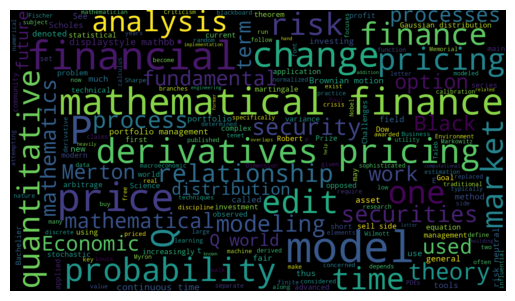

In [29]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()


$$\quad$$
$$\quad$$

---

$$\quad$$
$$\quad$$
$$\quad$$




**INTRO SENTIMENTAL ANALYSIS**

# Basic use of NLP

Natural Language Processing (NLP) is a field of Artificial Intelligence that focuses on the interaction betweeen computers and humans through natural language. Applications of NLP include but not limited to sentimental analysis, langauage translation, speech recognition, chatbots.  

In here our focus is on basic implementation of sentimental analysis. We want to capture the sentiments behind each sentence in the reuters textual data.


We start by importing the packages necessary to carry out sentimental analysis.

In [30]:
# Import packages
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [31]:
# Let's view the 5-th and 6-th sentence
for sent in reut_listc[4:6]:
  print(sent)

['unofficial', 'japanese', 'estimates', 'put', 'the', 'impact', 'of', 'the', 'tariffs', 'at', '10', 'billion', 'dlrs', 'and', 'spokesmen', 'for', 'major', 'electronics', 'firms', 'said', 'they', 'would', 'virtually', 'halt', 'exports', 'of', 'products', 'hit', 'by', 'the', 'new', 'taxes', '.']
['"', 'we', 'wouldn', "'", 't', 'be', 'able', 'to', 'do', 'business', ',"', 'said', 'a', 'spokesman', 'for', 'leading', 'japanese', 'electronics', 'firm', 'matsushita', 'electric', 'industrial', 'co', 'ltd', '&', 'lt', ';', 'mc', '.', 't', '>.']


In [32]:
# Let us join each sentence that has space between them
# Esentially joining the tokens
concat_list = [' '.join(sublist) for sublist in reut_listc]

In [33]:
# View results
for sent in concat_list[4:7]:
  print(sent)

unofficial japanese estimates put the impact of the tariffs at 10 billion dlrs and spokesmen for major electronics firms said they would virtually halt exports of products hit by the new taxes .
" we wouldn ' t be able to do business ," said a spokesman for leading japanese electronics firm matsushita electric industrial co ltd & lt ; mc . t >.
" if the tariffs remain in place for any length of time beyond a few months it will mean the complete erosion of exports ( of goods subject to tariffs ) to the u . s .," said tom murtha , a stock analyst at the tokyo office of broker & lt ; james capel and co >.


In [34]:
df = pd.DataFrame(concat_list)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54716 entries, 0 to 54715
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       54716 non-null  object
dtypes: object(1)
memory usage: 427.6+ KB


In [35]:
df.head()
#df.column = 'sentence'

df = df.rename(columns={df.columns[0]: 'sentence'})
df.head()

,sentence
0,asian exporters fear damage from u . s . japan...
1,they told reuter correspondents in asian capit...
2,but some exporters said that while the conflic...
3,the u . s . has said it will impose 300 mln dl...
4,unofficial japanese estimates put the impact o...


In [36]:
# Convert to string
df['sentence'] = df['sentence'].astype(str)

Clead the text

In [37]:
# Clean each sentnce function

def cleanSent(text):
  text = str(text)                  # set text to string
  text = re.sub(r'#', '', text)     # To remove symbol #
  #text = re.sub(r'RT', '', text)   # Remove Retweet mainly for twitter
  #text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentioned
  #text = re.sub(r'https?:\/\/S+', '', text) # remove hyper link

  return text


In [38]:
df['sentence'] = df['sentence'].apply(cleanSent)

In [39]:
# Create function to get the subjectivity
# Valence: polarity and subjectivity

# Sujectiveity tells us how subjective or opinionative a text is
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Polarity tells us how positive, negative or neutral a text/sentence is
def getPolarity(text):
  return TextBlob(text).sentiment.polarity


In [40]:
df['subjectivity'] = df['sentence'].apply((getSubjectivity))

In [41]:
df['polarity'] = df['sentence'].apply((getPolarity))

In [42]:
df.head()

,sentence,subjectivity,polarity
0,asian exporters fear damage from u . s . japan...,0.425000,0.200000
1,they told reuter correspondents in asian capit...,0.000000,0.000000
2,but some exporters said that while the conflic...,0.350000,-0.025000
3,the u . s . has said it will impose 300 mln dl...,0.133333,-0.138889
4,unofficial japanese estimates put the impact o...,0.318182,0.066288


## Wordclouds



In [43]:
allWords = ''.join( [sent for sent in df['sentence']] )

In [44]:
allWords[0:50] + ' ... . ' + allWords[-50:]

'asian exporters fear damage from u . s . japan rif ... . 000 vs 2 , 281 , 000 revs 32 . 6 mln vs 22 . 6 mln'

In [45]:
# instance
wordcloud = WordCloud( width= 1500, height= 850, random_state= 27, max_font_size= 130).generate(allWords)

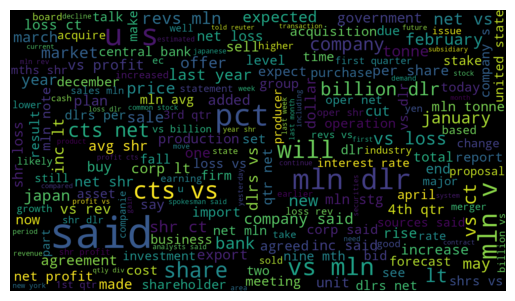

In [46]:
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

## Dealing with Stop words





In [47]:
from wordcloud import STOPWORDS

my_stopwords = set(STOPWORDS)
np.array(list(my_stopwords)[0:10])

array(["shouldn't", 'ourselves', 'has', "he'll", 'most', "when's", 'our',
       "shan't", "they'll", 'how'], dtype='<U9')

In [48]:
my_stopwords.update(['VS', 'mln', 'CTS', 'lt', 'dlr'])

In [49]:
# instance
wwordcloud = WordCloud( width= 1500, height= 850, random_state= 27, stopwords= my_stopwords, max_font_size= 130).generate(allWords)

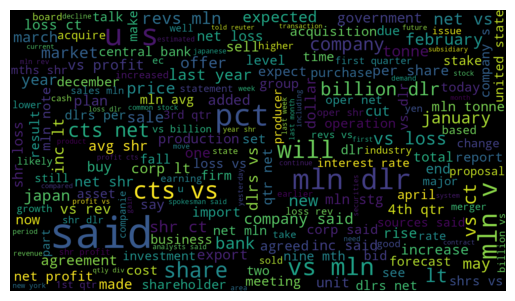

In [50]:

plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

There isn't any noticeable impact of the introduction of stopwords in our implementation, perhaps did not run something right.

In [51]:
# Define a function to compute neg, neut and positive score

def getAnalysis(score):

  score = round(score, 2)
  if score < 0:
    return 'negative'
  elif score == 0:
    return 'neutral'
  else:
    return 'positive'

In [52]:
df['analysis'] = df['polarity'].apply(getAnalysis)
df.head(10)
#df.polarity.head()

,sentence,subjectivity,polarity,analysis
0,asian exporters fear damage from u . s . japan...,0.425000,0.200000,positive
1,they told reuter correspondents in asian capit...,0.000000,0.000000,neutral
2,but some exporters said that while the conflic...,0.350000,-0.025000,negative
3,the u . s . has said it will impose 300 mln dl...,0.133333,-0.138889,negative
4,unofficial japanese estimates put the impact o...,0.318182,0.066288,positive
5,""" we wouldn ' t be able to do business ,"" said...",0.341667,0.100000,positive
6,""" if the tariffs remain in place for any lengt...",0.380208,-0.144792,negative
7,"in taiwan , businessmen and officials are also...",0.000000,0.000000,neutral
8,""" we are aware of the seriousness of the u . s .",0.250000,0.250000,positive
9,threat against japan because it serves as a wa...,0.000000,0.000000,neutral


In [53]:
# Create labels that would be used as targets in our models

df['label'] = np.where(df['analysis'] == 'positive', 1, 0)
df['label_'] = np.where(df['polarity'] > 0.0005, 1, 0)
df.head()

,sentence,subjectivity,polarity,analysis,label,label_
0,asian exporters fear damage from u . s . japan...,0.425000,0.200000,positive,1,1
1,they told reuter correspondents in asian capit...,0.000000,0.000000,neutral,0,0
2,but some exporters said that while the conflic...,0.350000,-0.025000,negative,0,0
3,the u . s . has said it will impose 300 mln dl...,0.133333,-0.138889,negative,0,0
4,unofficial japanese estimates put the impact o...,0.318182,0.066288,positive,1,1


In [54]:
ans = df.groupby('analysis').count()
print(f'Ans: {ans}')
print()
ans / ans.sum()


Ans:           sentence  subjectivity  polarity  label  label_
analysis                                                 
negative     11991         11991     11991  11991   11991
neutral      23631         23631     23631  23631   23631
positive     19094         19094     19094  19094   19094



,sentence,subjectivity,polarity,label,label_
analysis,,,,,
negative,0.219150,0.219150,0.219150,0.219150,0.219150
neutral,0.431885,0.431885,0.431885,0.431885,0.431885
positive,0.348966,0.348966,0.348966,0.348966,0.348966


In [55]:
counts = df.label.value_counts()
print(f'Count: {counts}\n')
print(counts / sum(counts))
print()

counts = df.label_.value_counts()
print(f'Count: {counts}')
counts / sum(counts)

Count: label
0    35622
1    19094
Name: count, dtype: int64

label
0    0.651034
1    0.348966
Name: count, dtype: float64

Count: label_
0    35515
1    19201
Name: count, dtype: int64


label_
0    0.649079
1    0.350921
Name: count, dtype: float64

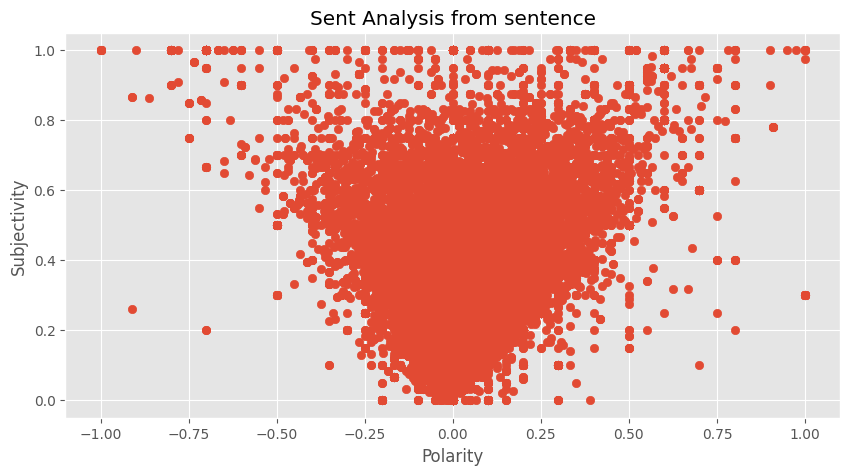

In [56]:
plt.figure(figsize = (10,5))
plt.scatter(df['polarity'], df['subjectivity'])
#plt.scatter( df['subjectivity'], df['polarity'] )
plt.title('Sent Analysis from sentence')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

The plot depicts the sentences are more subjective. Polarity and subjectivity share a somewhat  weak postive relationship.
By the way, the figure is very close to looking like a heart.

In [57]:
# Correlation between polarity and subjectivity
np.corrcoef(df.polarity, df.subjectivity)[0][1]

0.22180597471485794

## Problem Statment

Now we want to predict the sentiments in the reuters textual data, utilizing diffrerent sets of models: classification, clustering and neural network with clustering algorithm. To this end, we employ beside many the Logistic Regression, Support Vector Machine  Decision trees for classification, K-means clustering for clustering, Dense Neural Network with a classification algorithm for classification.

To start we select our 'sentence' column, and do some tokenization then proceed to lemmatization. Unlike stemming that returns root, lemming returns the actual word (although slower than stemming). However lemming is computationally expensive, so we avoid that route.

We need to transform words into numerical values as needed by the models. For this purpose **BOW or tfidf** can be used to transform text. We use tfidf for this study. The *TfidfVectorizer* does all this in the background.

After transforming the text, we split data into train and test, then proceed to modelling and predicting. Lastly we save the best model.

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(max_features= 100)
#X_train = vect.fit_transform(X)

# Fit and transform the sentences
X_fitt = vect.fit_transform(df.sentence)

cols = vect.get_feature_names_out()
cols.shape

(100,)

In [59]:
y = df.label

X = pd.DataFrame(X_fitt.toarray(), columns = cols)
X.head()

,000,10,15,1985,1986,1987,31,about,after,also,...,vs,was,we,week,were,which,will,with,would,year
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.350971,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.212101,0.0,0.000000,0.0
4,0.0,0.348054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.288087,0.0


In [60]:
from sklearn.model_selection import train_test_split

# Split data: Train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.35, random_state= 75)

In [61]:
pd.concat([X_train.head(), y_train.head()], axis = 1)

,000,10,15,1985,1986,1987,31,about,after,also,...,was,we,week,were,which,will,with,would,year,label
23064,0.339595,0.410744,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.4406,0.0,0.0,0.0,0.0,0.0,0.000000,0
42529,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.253563,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,1
16794,0.434603,0.000000,0.0,0.0,0.000000,0.0,0.0,0.246973,0.0,0.0,...,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0
53881,0.000000,0.306961,0.0,0.0,0.257332,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.224174,0
4367,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0


## Modelling  And Predicting Sentiments
$$\quad$$

Machine Learning (ML) is a type of computer algorithm that helps machines learn without the need for explicit programming. Broadly speaking there are three main classes of ML algorithm. Supervised Learning: This algorithm is trained on a set of input or features, along with a corresponding set of desired output or labels. Unsupervised Learning: The algorithm tries to extract structure from a dataset with no labels given. Reenforcement Learning:  Reinforcement learning allows for the specification of one of more intelligent agents whoes decisions evolve as the model is trained according to a specified cost function.




**Linear Regression**
Linear Regression is the most common supervied ML model used to predict a continuos and dependent variable y given one or more independent variables X. The parameters are obtained by minimizing the cost function - mean squared error.  

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


# Create and fit/train a Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)


''' Our values are continuous thus we truncate to 1 or 0
'''
# Predictions on train set
ypred_linr = np.where(linreg.predict(X_train) > 0.49, 1, 0)

# View predictions on train set
print(f'Predictions: {ypred_linr[:10]}\n')

# Train score
print(f'Train accuracy score: {accuracy_score(ypred_linr, y_train)}')
#print(f'Train Score: {linreg.score(X_train, y_train)}\n')
print()

# Predictions on test set
ypredt_linr = np.where( linreg.predict(X_test) > 0.49, 1, 0)

# Test score
print(f'Test accuracy score: {accuracy_score(ypredt_linr, y_test)}')

Predictions: [0 1 0 0 0 0 1 0 0 0]

Train accuracy score: 0.7242232531983692

Test accuracy score: 0.7315022714218579


$$\quad$$

**Logistic Regression**

A Logistic Regression model is a supervised classification ML model used to predict the dicrete outcome [0,1] given one or more independent variables (X). Logistic regression can be thought of as the equivalent to linear regression when the dependent variable is binary or from a finite group, although there are some subtle differences in the underlying assumptions.

In [63]:
from sklearn.linear_model import LogisticRegression

# Create and fit/train a Logistics Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


# Predictions on train amd test set
ypred_lr = logreg.predict(X_train)
ypredt_lr = logreg.predict(X_test)
print(f'Predictions: {ypred_lr[:10]}\n')

# Train score
print(f'Train accuracy score: {logreg.score(X_train, y_train)}\n')

# Test score
print(f'Test accuracy score: {accuracy_score(ypredt_lr, y_test)}\n')

Predictions: [0 1 0 0 0 0 1 0 0 0]

Train accuracy score: 0.7248418388865457

Test accuracy score: 0.7308234556942196



In [64]:
#import multiprocessing as mp
#mp.set_start_method('fork')

$$\quad$$
**Support Vector Machine**

SVM can be used for both classification and regression tasks, the decision boundary is often complex and non-linear,  making it difficult to undertand the decision making process and not easily interpretatble.  Moreover, SVM works by finding a separate hyperplane, instead of nimimzing the least squares distance, meaning it is less prone to outliers.

In [65]:
from sklearn.svm import LinearSVC, SVC

# Create and fit/train a Support Vector Machine
svm = LinearSVC()
#svm = SVC()
svm.fit(X_train, y_train)


# Predictions on train amd test set
ypred_svm = svm.predict(X_train)
ypredt_svm = svm.predict(X_test)

In [66]:
# Predictions on train set
print(f'Predictions: {ypred_svm[:10]}...\n')

# Train score
print(f'Train accuracy score: {svm.score(X_train, y_train)}')
print()

# Test score
print(f'Test accuracy score: {accuracy_score(ypredt_svm, y_test)}')

Predictions: [0 1 0 0 0 0 1 0 0 0]...

Train accuracy score: 0.7247574862927035

Test accuracy score: 0.7317111377995927


$$\quad$$

**Stochastic Gradient Classifier**

Stochastic Gradient Classifier is a supervised ML model that uses the stochastic gradient descent (SGD) to optimize the classification process. SGD uses few data training set at each iteration to compute the gradient of the cost function. This classifier has the advantage of been able to handle very large dataset eeficietntly, also it relies on randomness during training, hence the name stochastic.

In [67]:
from sklearn.linear_model import SGDClassifier

# Create and fit/train a Stoch Gradient Descent Class model
sgd_clf = SGDClassifier(random_state=75)
sgd_clf.fit(X_train, y_train)

# Predictions on train amd test set
ypred_sgd = sgd_clf.predict(X_train)
ypredt_sgd = sgd_clf.predict(X_test)
print(f'Predictions: {ypred_sgd[:10]}\n')

# Train score
print(f'Train accuracy score: {sgd_clf.score(X_train, y_train)}\n')

# Test score
print(f'Test accuracy score: {accuracy_score(ypredt_sgd, y_test)}\n')

Predictions: [0 1 0 0 0 0 1 0 0 0]

Train accuracy score: 0.7252354843244763

Test accuracy score: 0.7313978382329904



$$\quad$$

**Decision Trees**

Decision trees are popular supervised ML models used for both regression and classification tasks. The structure of DT includes nodes representing the features of the data, branches representing decision rules and leaf nodes representing the labels. They work by breaking a data set down based on its features, creating a tree like structure to model this data.

Scikit-learn uses the Classification and Regression Tree (CART) Algorithm to train Decision Tress (growing trees). The algorithm first splits the training set into two subsets using a single feature $K$ and a threshold $t_{k}$. It searches the pair paramters that produces the purest subsets and ends with minimizing the cost function.

In [68]:
from sklearn.tree import DecisionTreeClassifier

# Create and fit/train a Decision tree classifier model
dt_clas = DecisionTreeClassifier()
dt_clas.fit(X_train, y_train)

# Predictions on train amd test set
ypred_dt = dt_clas.predict(X_train)
ypredt_dt = dt_clas.predict(X_test)

In [69]:
# Predictions on train set
print(f'Predictions: {ypred_dt[:10]}...\n')

# Train score
print(f'Train accuracy score: {accuracy_score(ypred_dt, y_train)}\n')

# Test score
print(f'Test accuracy score: {accuracy_score(ypredt_dt, y_test)}')

Predictions: [0 1 0 0 0 0 1 0 1 0]...

Train accuracy score: 0.9935892028679882

Test accuracy score: 0.6668581275129236


$$\quad$$
**Random Forest**

Randon forest combines the predictions made by multiple decision trees and returns a single outcome. Through a technique known as bagging or bootsrap aggregation, the model leverages the capabilities of multiple predictive models or decision trees. For regression output is the average of all predictions and for classification a majority class prediction is made.  

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit a Random classifier model
rf_clas = RandomForestClassifier(random_state=75)
rf_clas.fit(X_train, y_train)

# Predictions on train and test set
ypreds_rf = rf_clas.predict(X_train)
ypredst_rf = rf_clas.predict(X_test)

In [71]:
# Predictions on train set
print(f'Predictions: {ypreds_rf[:10]}...\n')

# Train score
print(f'Train accuracy score: {accuracy_score(ypreds_rf, y_train)}\n')

# Test score
print(f'Test accuracy score: {accuracy_score(ypredst_rf, y_test)}')

Predictions: [0 1 0 0 0 0 1 0 1 0]...

Train accuracy score: 0.9935892028679882

Test accuracy score: 0.74701059996867


$$\quad$$
**Gradient Boosting**

Boosting also called hypothesis boosting, refers to any ensemble method that combines several weak learners into strong learners . Each predictor is trained sequentially with the subsequent trying to correct the errors of its predecessor. Popular boosting technique includes AdaBoost and Gradient Boosting.

Gradient boosting works by sequentially adding predictors to ensemble, each one correcting its predecessor. Instaead of tweaking the weights at every instance as Adaboost, this method tries to fit in new predictors.

In [72]:
import xgboost as xgb

# Create and fit/train a Gradient boosted tree
xgb_clas = xgb.XGBClassifier()
xgb_clas.fit(X_train, y_train)

# Predictions on train and test set
ypreds_gbt = xgb_clas.predict(X_train)
ypredst_gbt = xgb_clas.predict(X_test)

In [73]:
# Predictions on train set
print(f'Predictions: {ypreds_gbt[:10]}...\n')

# Train score
print(f'Train accuracy score: {accuracy_score(ypreds_gbt, y_train)}\n')

# Train Score
print(f'Test accuracy score: {accuracy_score(ypredst_gbt, y_test)}')

Predictions: [0 1 0 0 0 0 1 0 0 0]...

Train accuracy score: 0.7795304372276114

Test accuracy score: 0.7311889718552556


$$\quad$$
**Naive Bayes Classifiers**

Naive Bayes classifiers are a family of simple probabilistic classifiers based on Bayes' theorem with strong (naive) independence assumptions between the features. Computationally efficient and works well with large datasets relating to spam detection, sentiment analysis, predicting diseases based on symptoms.

In [74]:
from sklearn.naive_bayes import MultinomialNB

# Create and fit/train a Naive Bayes classifier model
nb_class = MultinomialNB()
nb_class.fit(X_train, y_train)

# Predictions on train and test set
ypreds_nb = nb_class.predict(X_train)
ypredst_nb = nb_class.predict(X_test)

In [75]:
# Predictions on train set
print(f'Predictions: {ypreds_nb[:10]}...\n')

# Train score
print(f'Train accuracy score: {accuracy_score(ypreds_nb, y_train)}\n')

# Train Score
print(f'Test accuracy score: {accuracy_score(ypredst_nb, y_test)}')

Predictions: [0 1 0 0 0 0 1 0 0 0]...

Train accuracy score: 0.7144102347813862

Test accuracy score: 0.7218422014516214


$$\quad$$

**K-Nearest Neighbors**

K-NN is a non-parametric, instance-based supervised ML learning algorithm that classifies a data point based on how its neighbors are classified. The k in the name K-nearest neighbor reflects the fact that the k nearest neighbors are used to inform the classification for each new piece of data.


In [76]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit/train a K-Nearest model
knn = KNeighborsClassifier(2)
knn.fit(X_train, y_train)

# Predictions on train and test set
ypreds_knn = knn.predict(X_train)
ypredst_knn = knn.predict(X_test)

In [77]:
# Predictions on train set
print(f'Predictions: {ypreds_knn[:10]}...\n')

# Train score
print(f'Train accuracy score: {accuracy_score(ypreds_knn, y_train)}\n')

# Train Score
print(f'Test accuracy score: {accuracy_score(ypredst_knn, y_test)}')

Predictions: [0 1 0 0 0 0 1 0 1 0]...

Train accuracy score: 0.8174047518627865

Test accuracy score: 0.6880058482585766


$$\quad$$
**K-Means Clustering**

K-Means clustering is an unsupervised ML model that essentially ingest unlabelled data and assign each data point to a cluster. A datapoint belongs to a cluster with the nearest mean. It's worth knowing that this model is naturally built for clustering, and does not fall under the umbrella of clasification techniques. It is used in here for illustration.

In [78]:
from sklearn.cluster import KMeans

# Create and fit/train the K-Means clustering model
kmc = KMeans(n_clusters = 2)
kmc.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [92]:
''' It was hard to depict which cluster label went to 1, or 0.
'''

# Predictions on train and test set
ypred_kmc =  np.where(kmc.predict(X_train) == 1, 0, 1)
#ypred_kmc = kmc.predict(X_train)
ypredt_kmc = np.where(kmc.predict(X_test) == 1, 0, 1)

# Predictions on train set
print(f'Predictions: {ypred_kmc[:10]}...\n')

# Train score
print(f'Train accuracy score: {accuracy_score(ypred_kmc, y_train)}\n')
#kmc.score(X_train, y_train)

# Train Score
print(f'Test accuracy score: {accuracy_score(ypredt_kmc, y_test)}')

Predictions: [0 0 0 0 0 0 0 0 0 0]...

Train accuracy score: 0.6074230282581189

Test accuracy score: 0.6167824134509947



In my opinion, considering we settled for the default settings to train the classification models and archieved an average accuracy of about 65% on the test data, does not sound bad, but well there's room for improvement. We witnessed cases of overfitting, particularly with trees and forest models, where the accuracy of the train is greater than test, and test is less than 85. This problem once tackled can significantly improve on the test results.

$$\quad$$

**Techniques to improve classification models results**

 - Overfitting problems in particular can be addresed through various techniques such as regualarization, hyperparameter tuning, cross-validation, adjusting complexity of the model.


- There exist an outstanding classification technique known as **Voting Classifier**, it aggregates results of understudy classification models and makes superp predictions. It can be archieved with importing 'VotingClassifier' function from 'sklearn.ensemble' package. Implementing this can enhance accuracy results with the test set.

- Another approach that can be used to improve the accuracy with both train and test set is to use the KMeans clustering algorithm as as preprocessing technique. Built in a *pipeline* using the *pipeline* function from sklearn, where we have K-Means clustering then the chosen classifier model, and now the fit and predit methods. This robust technique is also known to improving results.

$$\quad$$
**Neural Network**

Neural Network can be both a supervised or unsupervised technique. A neural network is a computational model isnpired by the structure and function of the human's brain neural network.

From left to right, It consist of nodes, called neurons, organized in layers, each neurons receives input data applies an activation function then passes the result to the next, and so forth until the output layer. Methods like backprogation and optimization algorithm, such as gradient descent are used to update weights and biases to minimize prediction errors.  


In [80]:
import tensorflow as tf
tf.random.set_seed(75)

In [81]:
# Neural Network Framework: Keras with tf used as backend.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [82]:
X_train.shape[1]

100

I'd define my choice of the input paramters such as the number of nodes, hidden layers etc to be discretionary, and somewhat arbitrary.

Network architecture: We structure the neural network to have input equal the number of columns of the data, then have two hidden layers and obviouly one one output layer. We define the first hidden layer to have nodes 3 times the number of input dimension and 1.5 times the that number for the second hidden layer. 25  epochs implies  the model is trained 25 times using the entire data set in each epoch, thus the default batch size for each epoch is equal to the length of X_train data set.



In [83]:
## Instantiate, build and fit/train a dense neural network
''' Define model architecture: FNN/DNN.
'''
model = Sequential()

# 1st hidden layer
model.add(Dense(300, activation= 'relu', input_dim = X_train.shape[1]))

# 2nd hidden layer
model.add(Dense(150, activation= 'relu'))

# output layer
model.add(Dense(1, activation= 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer= 'rmsprop', metrics = ['acc'])

model.fit(X_train, y_train, epochs= 25, verbose= False)
#model.fit(X_train, y_train, epochs= 50, validation_split= 0.1, verbose= False)

In [95]:
''' Our values are continuous thus we truncate to 1 or 0
'''
ypred_nn = model.predict(X_train)
ypred_nn = np.where(ypred_nn.flatten() > 0.5, 1, 0)

# Predictions
print(f'Predictions: {ypred_nn[:10]}...\n')

# Train score
print(f'Train accuracy core: {accuracy_score(ypred_nn, y_train)}\n')

ypred_nn = model.predict(X_test)
ypredt_nn = np.where(ypred_nn.flatten() > 0.5, 1, 0)

# Test score
print()
print(f'Test accuracy score: {accuracy_score(ypredt_nn, y_test)}')

1112/1112 [==============================] - 2s 2ms/step
Predictions: [1 1 0 0 0 0 1 0 1 0]...

Train accuracy core: 0.891944327288064

599/599 [==============================] - 1s 2ms/step

Test accuracy score: 0.6901989452247924


We obtain a test accuracy of 69%, clearly our DNN model also suffers from overfitting, to curb this we can implement regularization techniques such as L1/L2 or dropout some neurons, furthermore we can include early stopping along with validation split, batch normalization could also help stabilizing the learning process and improve results.

$$\quad$$

**Save Best Model**


It was a very close call, SVM and SGD were very close, for our best model we choose SVM with a training and test accuracy of 72.5% and 73.2%. The model performs similarly on both training and test set, although the accuracies are moderate. Despite trees and forest models scoring bove 90% on training set, the SVM model seems to be good fit with descent generalization and does not suffer from overfitting like the trees, forest and neural network models.


In [85]:
# import pickle
import pickle

In [96]:
# save model, filename = what to call file.
filename = 'svm.sav' # or 'svm.pk'

In [97]:
pickle.dump(model, open(filename, 'wb')) # 'wb' writing file

In [88]:
# Using save model on new data to predict
# load_model = pickle.load(open('filepath', 'rb')) # 'rb' reading file
# load_model.predict(new_data)

In [89]:
'''
Some files could be very heavy, to this end they can be saved as HDF5. It
Stores everything including model architecture, weight and biases, optimizers etc.
'''
# Save keras neural network model
# model.save("my_winning_model.h5")

' \nSome files could be very heavy, to this end they can be saved as HDF5. It\nStores everything including model arcitecture, weight and biases, optimizers \nin case of neuaral network. \n'

In [90]:
# Restore model and predict given new features
# model = model.keras.models.load_model("my_winning_model.h5")
# model.predict(new_features)

# THE END !!